In [9]:
import numpy as np

# sample_freq = 8000           # サンプリング周波数
sample_freq = 250
# cutoff_freq = 1000           # 遮断周波数（カットオフ周波数）(Hz)
cutoff_freq = 25
N = 11                       # インパルス応答の個数
T = 1/sample_freq            # 周期
g_delay = T * ((N-1) / 2)   # 群遅延
alpha = 0.540               # ハミング窓

omega_c = 2 * np.pi * cutoff_freq

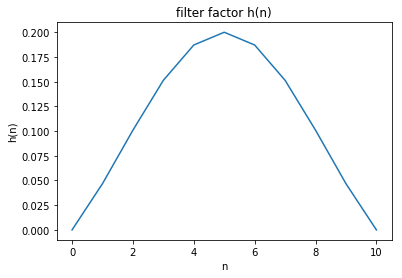

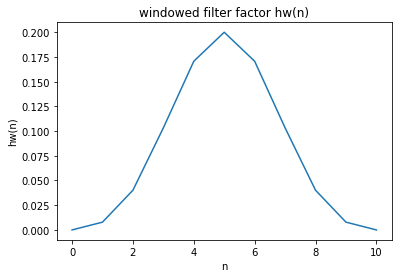

In [10]:
import matplotlib.pyplot as plt
abs_N = N + int(g_delay)
hw = [0] * abs_N
w = [0] * abs_N
h = [0] * abs_N

for i in range(int(g_delay), abs_N, 1):
    # 一般化ハミング窓の計算
    w[i] = alpha + ((1-alpha) * np.cos((2*np.pi*(i-(g_delay/T))) / (N-1)))
    
    # フィルタ係数の計算
    # 分母が0になる場合, sin(x)/x = 1 (x -> 0)を利用して計算
    if np.pi*(i-(g_delay/T)) == 0.0:
        h[i] = (omega_c*T) / np.pi
    else:
        h[i] = np.sin((i-(g_delay/T))*omega_c*T) / (np.pi*(i-(g_delay/T)))
    # 窓関数がかかったフィルタ係数hw(n)を計算
    hw[i] = w[i] * h[i]

plt.title('filter factor h(n)')
plt.xlabel('n')
plt.ylabel('h(n)')
plt.plot(h)
plt.show()
    
plt.title('windowed filter factor hw(n)')
plt.xlabel('n')
plt.ylabel('hw(n)')
plt.plot(hw)
plt.show()

In [11]:
# カラーのセンサデータを読み込む
import pandas as pd

with open('ev3_SampleData.csv') as f:
    f.read()

df = pd.read_csv('ev3_SampleData.csv', index_col=0, header=0)

print(type(df))
print(df.head())

<class 'pandas.core.frame.DataFrame'>
    color  turn      p         i       d
id                                      
1      21    -9 -0.324 -0.001050 -9.1125
2      21     0 -0.324 -0.003149  0.0000
3      21     0 -0.324 -0.005249  0.0000
4      21     0 -0.324 -0.007348  0.0000
5      21     0 -0.324 -0.009448  0.0000


In [12]:
# 4msごとにcolorを取得しているので、
# 4msごとのcolorの値を見るためのDataFrameを作成

df_color_4ms = pd.DataFrame({
    'time' : range(0, len(df)*4, 4),
    'color' : df.iloc[:, 0]
})
print(df_color_4ms.head())

    time  color
id             
1      0     21
2      4     21
3      8     21
4     12     21
5     16     21


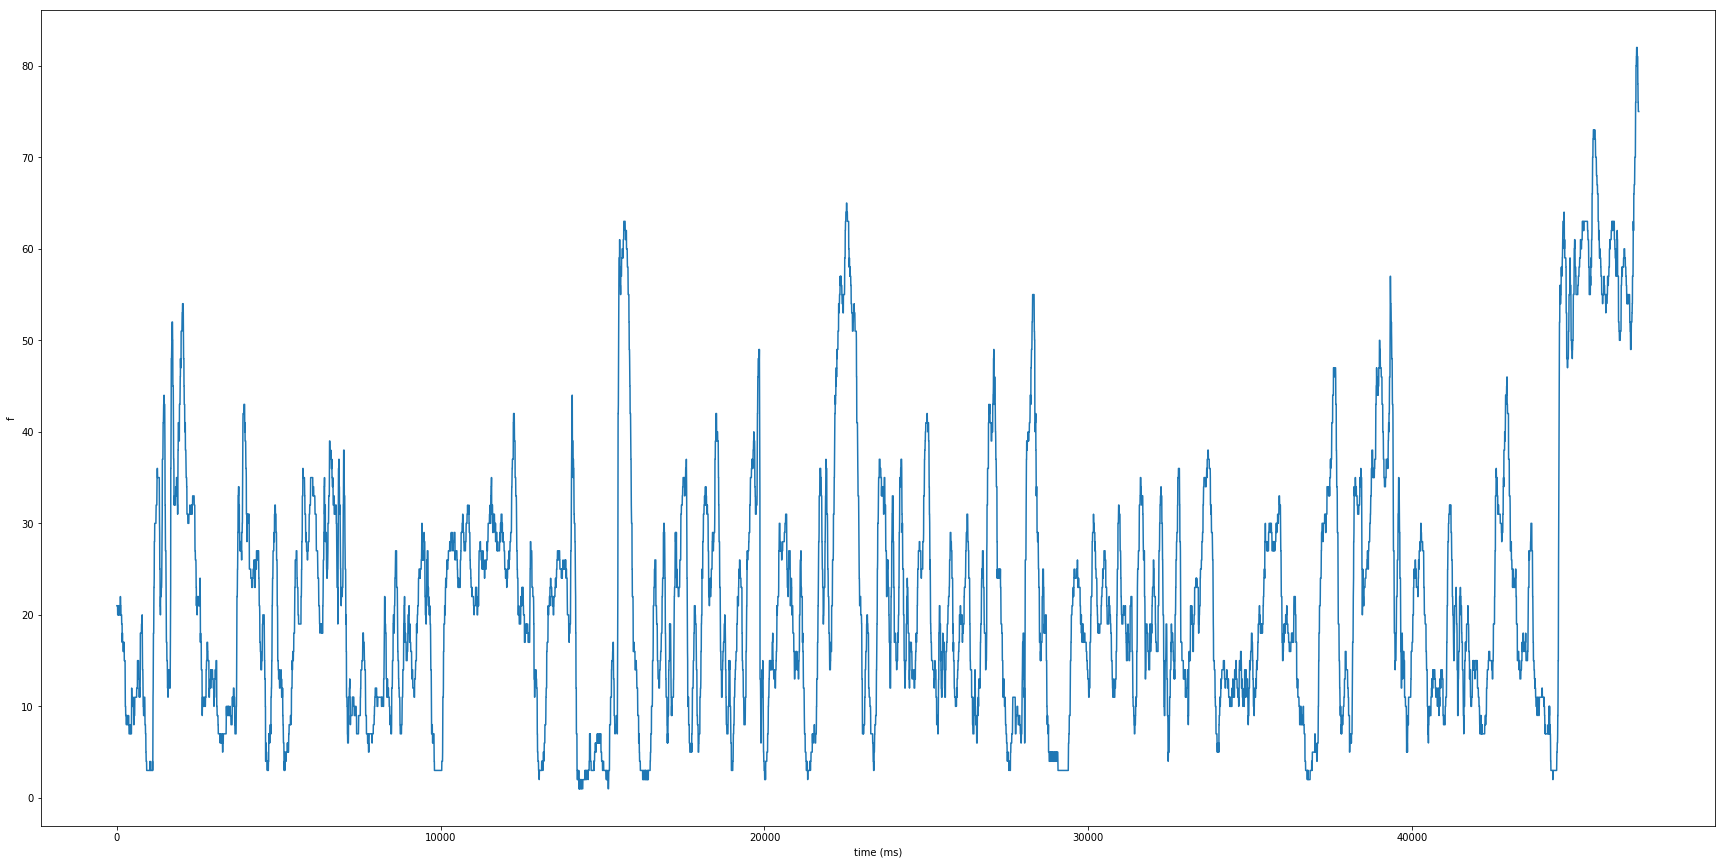

In [13]:
f = np.array(df_color_4ms.iloc[:, 1].values.flatten())
t = range(0, len(f)*4, 4)

# 生のカラーデータをプロット
# plt.figure(figsize=(100,50), dpi=200)
plt.figure(figsize=(30, 15))
plt.plot(t, f)
plt.xlabel("time (ms)")
plt.ylabel("f")
plt.show()

0.8438259865040723
len(f)= 11748 len(y1)= 11748


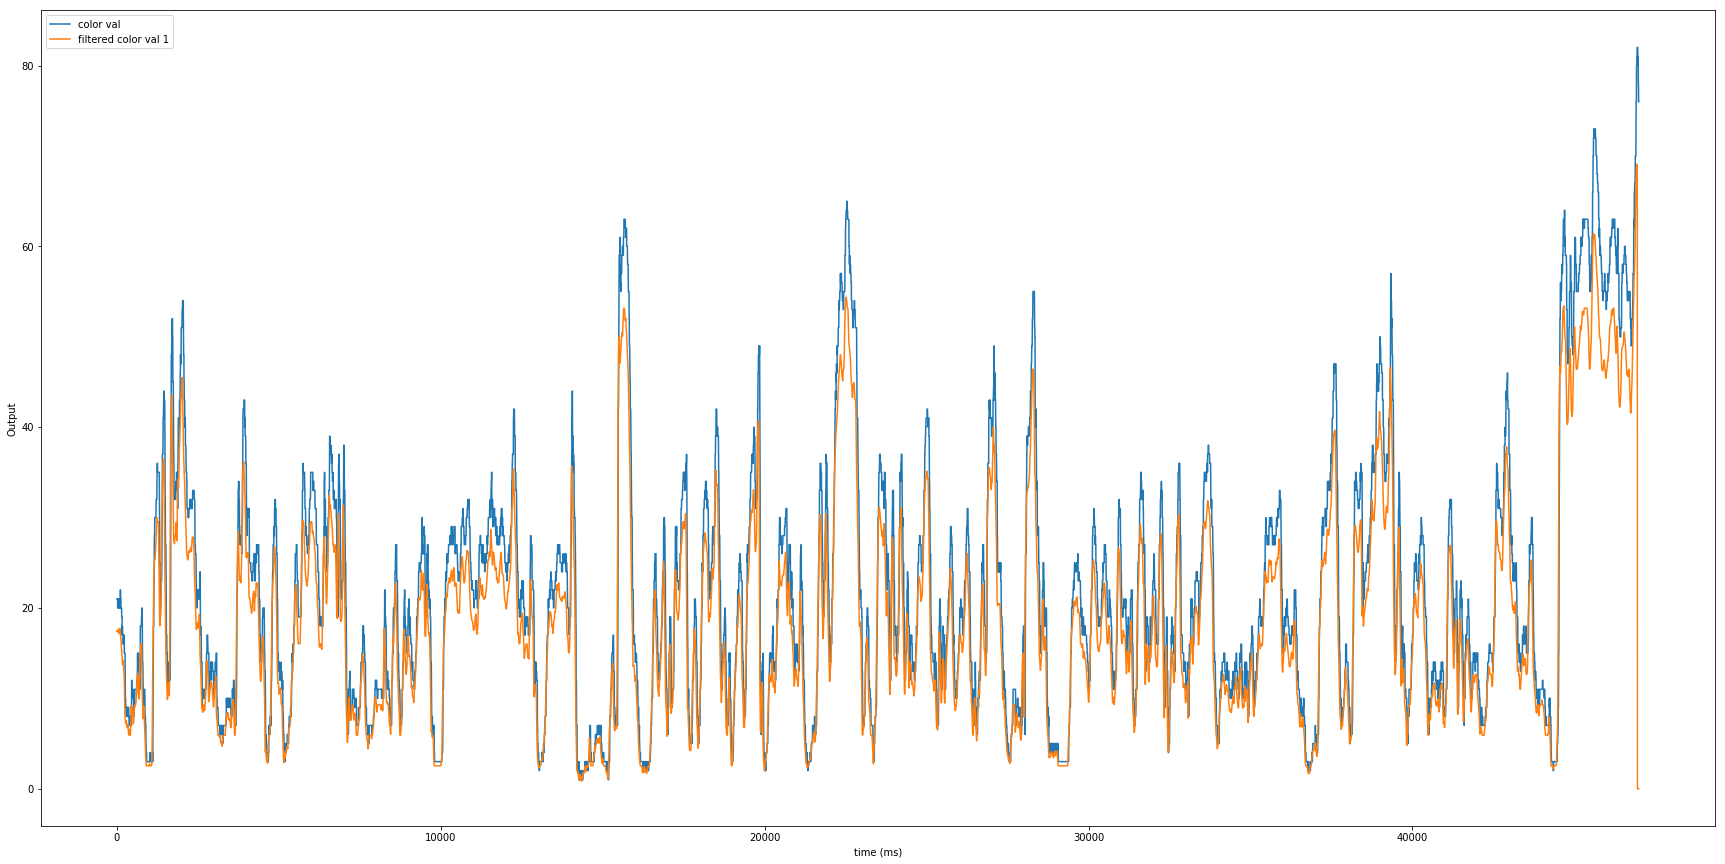

In [14]:
# fのデータ数をNの倍数にするための加工
f = np.array(df_color_4ms.iloc[:, 1].values.flatten())
index = [len(f)-4, len(f)-3, len(f)-2, len(f)-1]
f = np.delete(f, index)

y1 = [0] * len(f)
y2 = [0] * len(f)
fir = [0.0000, -0.0072, -0.0215, 0.0612, 0.2738, 0.3874, 0.2738, 0.0612, -0.0215, -0.0072, 0.0000]

print(np.sum(hw))

print('len(f)=', len(f), 'len(y1)=', len(y1))

for i in range(N, len(f), 1):
    for j in range(0, N, 1):
#         print('i=', i, ' j=', j, 'i-(N-j)=', i-(N-j), 'i-N=', i-N)
        # 生データにフィルタ係数をかける
        y1[i-N] += f[i-(N-j)] * hw[j]
        y2[i-N] += f[i-(N-j)] * fir[j]
    
# 生データとフィルタ後のデータをプロット
t = range(0, len(f)*4, 4)
plt.figure(figsize=(30, 15))
plt.plot(t, f, label='color val')              # 元のカラーデータ
plt.plot(t, y1, label='filtered color val 1')  # フィルタリング結果1
# plt.plot(t, y2, label='filtered color val 2')
# フィルタリング結果2
plt.xlabel("time (ms)")
plt.ylabel("Output")
plt.legend(loc = 'upper left')
plt.show()